In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("train.csv",nrows=15000)
label=df["label"]
df.drop("label",axis=1,inplace=True)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(15000, 784)

In [4]:
df_standard=StandardScaler().fit_transform(df) #standardising the data 

In [5]:
df_standard.shape

(15000, 784)

In [8]:
tsne=TSNE(n_components=2,random_state=0) #n_components=2 because we need 2-d 
df_2d=tsne.fit_transform(df_standard)

In [9]:
df_2d.shape

(15000, 2)

In [10]:
label.to_numpy().reshape(-1,1).shape

(15000, 1)

In [12]:
tsne_data = np.hstack((df_2d, label.to_numpy().reshape(-1,1))) #combining
tsne_data.shape

(15000, 3)

In [14]:
tsne_data

array([[ 72.28873444, -26.24544907,   1.        ],
       [-48.75322723, -43.5597496 ,   0.        ],
       [ 54.77495193,  21.66035652,   1.        ],
       ...,
       [ 37.29674911, -21.42344093,   8.        ],
       [-13.0556097 ,  49.39334869,   9.        ],
       [-59.66506577, -26.95933533,   6.        ]])

In [25]:
data=pd.DataFrame({"1st":tsne_data[:,0:1].flatten(),"2nd":tsne_data[:,1:2].flatten(),"labels":tsne_data[:,2:].flatten()}) 
#we faltten to make 1-d array

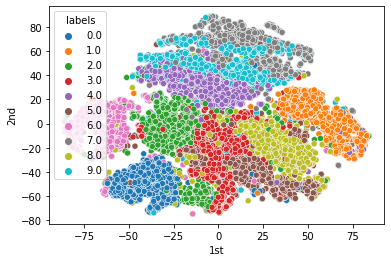

In [28]:
sns.scatterplot(data=data,x="1st",y="2nd",hue="labels",palette=sns.color_palette("tab10"))
plt.show()
#plotting the 784 dimensional data to 2-d to visualize
#tsne is beautiful technique to visualize data

In [29]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]